In [1]:
import pandas as pd
import re
import sklearn.neighbors as nb
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder as LB
import sklearn.model_selection as cv
import sklearn
from sklearn import preprocessing
import random as rand
import numpy as np
import math

# Loading data 

In [2]:
data = pd.read_csv('games_clean.csv')
labels_num = ['Presence','Memory','ReleaseDate','OriginalCost','DiscountedCost','Achievements','Storage',
                'RatingsBreakdown-Recommended','RatingsBreakdown-Meh','RatingsBreakdown-Exceptional','RatingsBreakdown-Skip',
              'Metacritic']

In [3]:
data = data[labels_num]
data

,Presence,Memory,ReleaseDate,OriginalCost,DiscountedCost,Achievements,Storage,RatingsBreakdown-Recommended,RatingsBreakdown-Meh,RatingsBreakdown-Exceptional,RatingsBreakdown-Skip,Metacritic
0,41.0,2000.0,2017.0,5.99,0.0,0.0,450.0,2.0,1.0,1.0,3.0,"(68.619, 73.573]"
1,25415.0,1000.0,2012.0,3.99,0.0,44.0,120.0,4.0,9.0,1.0,6.0,"(73.573, 94.0]"
2,1421.0,4000.0,2016.0,1.99,0.0,0.0,2000.0,2.0,1.0,1.0,1.0,"(19.999, 63.527]"
3,257.0,4000.0,2013.0,9.99,0.0,20.0,12000.0,2.0,2.0,1.0,1.0,"(68.619, 73.573]"
4,250.0,256.0,2017.0,4.99,0.0,0.0,312.0,2.0,1.0,1.0,2.0,"(63.527, 68.619]"
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,28.0,2000.0,2019.0,5.99,0.0,0.0,800.0,2.0,1.0,1.0,3.0,"(19.999, 63.527]"
9996,647.0,4000.0,2019.0,19.99,0.0,50.0,3000.0,11.0,2.0,8.0,1.0,"(63.527, 68.619]"
9997,308.0,1000.0,2016.0,7.99,0.0,0.0,500.0,2.0,1.0,1.0,1.0,"(63.527, 68.619]"
9998,253.0,8000.0,2017.0,12.99,0.0,0.0,600.0,1.0,1.0,1.0,3.0,"(19.999, 63.527]"


In [4]:
LE = LB()
class_names = data['Metacritic'].unique()
data.loc[:, 'Metacritic'] = LE.fit_transform(data['Metacritic'])

In [5]:
# Let's separate Data from labels

X = data.drop(['Metacritic'],axis=1)   # Data
y = data['Metacritic']

print(X.shape)
print(y.shape)

(10000, 11)
(10000,)


# Normalize data

In [6]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
X_scaled = pd.DataFrame(min_max_scaler.fit_transform(X), columns = X.columns)
X_scaled

,Presence,Memory,ReleaseDate,OriginalCost,DiscountedCost,Achievements,Storage,RatingsBreakdown-Recommended,RatingsBreakdown-Meh,RatingsBreakdown-Exceptional,RatingsBreakdown-Skip
0,0.000050,0.000336,0.823529,0.133111,0.0,0.000000,0.003742,0.005556,0.000000,0.000000,0.068966
1,0.030998,0.000168,0.529412,0.088667,0.0,0.050459,0.000992,0.016667,0.121212,0.000000,0.172414
2,0.001733,0.000672,0.764706,0.044222,0.0,0.000000,0.016658,0.005556,0.000000,0.000000,0.000000
3,0.000313,0.000672,0.588235,0.222000,0.0,0.022936,0.099992,0.005556,0.015152,0.000000,0.000000
4,0.000305,0.000043,0.823529,0.110889,0.0,0.000000,0.002592,0.005556,0.000000,0.000000,0.034483
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.000034,0.000336,0.941176,0.133111,0.0,0.000000,0.006658,0.005556,0.000000,0.000000,0.068966
9996,0.000789,0.000672,0.941176,0.444222,0.0,0.057339,0.024992,0.055556,0.015152,0.033654,0.000000
9997,0.000376,0.000168,0.764706,0.177556,0.0,0.000000,0.004158,0.005556,0.000000,0.000000,0.000000
9998,0.000309,0.001344,0.823529,0.288667,0.0,0.000000,0.004992,0.000000,0.000000,0.000000,0.068966


# Starting KNN

In [7]:
# Let's do a simple cross-validation: split data into training and test sets (test 30% of data)
(X_train, X_test,  y_train, y_test) = cv.train_test_split(X_scaled, y, test_size=.3, random_state=1)

# Create a kNN classifier object
knc = nb.KNeighborsClassifier()

# Train the classifier
knc.fit(X_train, y_train)

# Obtain accuracy score of learned classifier on test data
print(knc.score(X_test, y_test))

0.5306666666666666


In [8]:
# More information with confussion matrix
from sklearn.metrics import confusion_matrix

y_pred = knc.predict(X_test)
print(sklearn.metrics.confusion_matrix(y_test, y_pred))

[[434 115  95  84]
 [201 381 113  68]
 [139 116 390  96]
 [121 121 139 387]]


In [9]:
# Obtain Recall, Precision and F-Measure for each class
from sklearn import metrics

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.48      0.60      0.53       728
           1       0.52      0.50      0.51       763
           2       0.53      0.53      0.53       741
           3       0.61      0.50      0.55       768

    accuracy                           0.53      3000
   macro avg       0.54      0.53      0.53      3000
weighted avg       0.54      0.53      0.53      3000



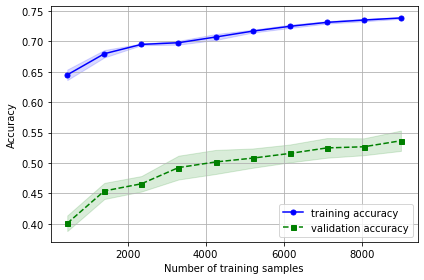

In [11]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=nb.KNeighborsClassifier(n_neighbors=3),
                               X=X_scaled,
                               y=y,
                               train_sizes=np.linspace(0.05, 1.0, 10),
                               cv=10,
                               n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid(True)
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig('learning_curve.png', dpi=600)
plt.show()

In [12]:
from sklearn.model_selection import cross_val_score  
from sklearn.model_selection import cross_val_predict  
from sklearn.metrics import accuracy_score

# Results with different parameters: k
cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=1), X=X_scaled, y=y,  cv=10)  
print("Accuracy 1 neighbour:", np.mean(cv_scores))

cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=3), X=X_scaled, y=y,  cv=10)  
print("Accuracy 3 neighbours:",  np.mean(cv_scores))

cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=5), X=X_scaled, y=y,  cv=10)  
print("Accuracy 5 neighbours:",  np.mean(cv_scores))

cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=7), X=X_scaled, y=y,  cv=10)  
print("Accuracy 7 neighbours:",  np.mean(cv_scores))

cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=9), X=X_scaled, y=y,  cv=10) 
print("Accuracy 9 neighbours:",  np.mean(cv_scores))

Accuracy 1 neighbour: 0.5559000000000001
Accuracy 3 neighbours: 0.5367
Accuracy 5 neighbours: 0.5439
Accuracy 7 neighbours: 0.5432
Accuracy 9 neighbours: 0.5393000000000001


In [13]:
# Results with different parameters: k and distance weighting
cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=1,weights='distance'), X=X_scaled, y=y,  cv=10)  
print("Accuracy 1 neighbour and distance weighting:", np.mean(cv_scores))

cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=3,weights='distance'), X=X_scaled, y=y,  cv=10)  
print("Accuracy 3 neighbour and distance weighting:", np.mean(cv_scores))

cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=5,weights='distance'), X=X_scaled, y=y,  cv=10)  
print("Accuracy 5 neighbour and distance weighting:", np.mean(cv_scores))

cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=7,weights='distance'), X=X_scaled, y=y,  cv=10)  
print("Accuracy 7 neighbour and distance weighting:", np.mean(cv_scores))

cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=9,weights='distance'), X=X_scaled, y=y,  cv=10)  
print("Accuracy 9 neighbour and distance weighting:", np.mean(cv_scores))

Accuracy 1 neighbour and distance weighting: 0.5559000000000001
Accuracy 3 neighbour and distance weighting: 0.5608
Accuracy 5 neighbour and distance weighting: 0.5638
Accuracy 7 neighbour and distance weighting: 0.5633999999999999
Accuracy 9 neighbour and distance weighting: 0.5656000000000001


# Authomatically find best parameters

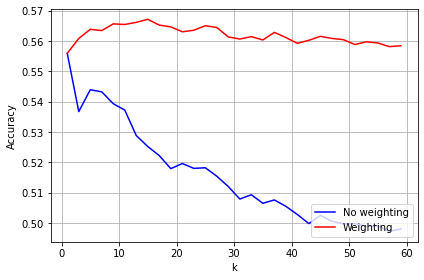

In [14]:
lr = []
for ki in range(1,60,2):
    cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=ki), X=X_scaled, y=y, cv=10)
    lr.append(np.mean(cv_scores))
plt.plot(range(1,60,2),lr,'b',label='No weighting')

lr = []
for ki in range(1,60,2):
    cv_scores = cross_val_score(nb.KNeighborsClassifier(n_neighbors=ki,weights='distance'), X=X_scaled, y=y, cv=10)
    lr.append(np.mean(cv_scores))
plt.plot(range(1,60,2),lr,'r',label='Weighting')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()

plt.show()

# Grid Search method

In [35]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':list(range(1,60,2)), 'weights':('distance','uniform')}
knc = nb.KNeighborsClassifier()
clf = GridSearchCV(knc, param_grid=params,cv=10,n_jobs=-1)  # If cv is integer, by default is Stratifyed 
clf.fit(X_scaled, y)
print("Best Params=",clf.best_params_, "Accuracy=", clf.best_score_)

Best Params= {'n_neighbors': 15, 'weights': 'distance'} Accuracy= 0.5670999999999999


# Feature Selection

In [36]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)
clf = clf.fit(X_scaled, y)
thresholds=clf.feature_importances_
print(thresholds.min())
print(thresholds.max())
thresholds

0.007302366868313835
0.18100313705115564


array([0.18100314, 0.09324211, 0.12977914, 0.13708578, 0.00730237,
       0.08373075, 0.13720463, 0.07218627, 0.0542967 , 0.04658499,
       0.05758413])

In [40]:
from sklearn.feature_selection import SelectFromModel

model = SelectFromModel(clf, prefit=True, threshold=0.05)
X_new = model.transform(X_scaled)
print(X_new.shape)

print(np.mean(cross_val_score(nb.KNeighborsClassifier(n_neighbors=15, weights='distance'), X=X_scaled, y=y, cv=10, scoring='accuracy')))
print(np.mean(cross_val_score(nb.KNeighborsClassifier(n_neighbors=15, weights='distance'), X=X_new, y=y, cv=10, scoring='accuracy')))

(10000, 9)
0.5670999999999999
0.5606000000000001


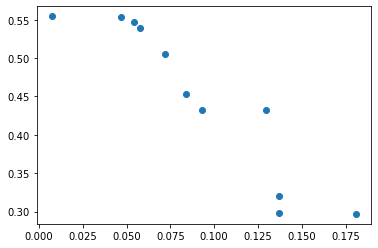

Best threshold:  0.007302366868313835
Best params for this threshold= {'n_neighbors': 33, 'weights': 'distance'}


In [41]:
l=[]
lparval=[]
for threshold in thresholds:
    model = SelectFromModel(clf, prefit=True, threshold=threshold)
    X_new = model.transform(X_train)
    params = {'n_neighbors':list(range(1,60,2)), 'weights':('distance','uniform')}
    knc = nb.KNeighborsClassifier()
    clf2 = GridSearchCV(knc, param_grid=params,cv=10,n_jobs=-1)  # If cv is integer, by default is Stratifyed 
    clf2.fit(X_new, y_train)
    parval=clf2.best_params_
    clf3 = nb.KNeighborsClassifier(n_neighbors=parval['n_neighbors'],weights=parval['weights'])
    acc = np.mean(cross_val_score(clf3, X=X_new, y=y_train, cv=10, scoring='accuracy'))
    l.append(acc)
    lparval.append(parval)
    
plt.scatter(thresholds,l)
plt.show()

print('Best threshold: ',thresholds[np.argmax(l)])
print("Best params for this threshold=",parval)

In [46]:
parval=lparval[np.argmax(l)]
model = SelectFromModel(clf, prefit=True, threshold=thresholds[np.argmax(l)])
X_new = model.transform(X_test)
print(X_new.shape)
clf_new = nb.KNeighborsClassifier(n_neighbors=parval['n_neighbors'],weights=parval['weights'])
print('Original: ', np.mean(cross_val_score(nb.KNeighborsClassifier(n_neighbors=15, weights='distance'), X=X_test, y=y_test, cv=10, scoring='accuracy')))
print('With FS: ', np.mean(cross_val_score(clf_new, X=X_new, y=y_test, cv=10, scoring='accuracy')))

(3000, 11)
Original:  0.5039999999999999
With FS:  0.5046666666666667


In [47]:
parval=lparval[np.argmax(l)]
model = SelectFromModel(clf, prefit=True, threshold=thresholds[np.argmax(l)])
X_new = model.transform(X_scaled)
clf_new = nb.KNeighborsClassifier(n_neighbors=parval['n_neighbors'],weights=parval['weights'])
print('Original: ', np.mean(cross_val_score(nb.KNeighborsClassifier(n_neighbors=15, weights='distance'), X=X_scaled, y=y, cv=10, scoring='accuracy')))
print('With FS: ', np.mean(cross_val_score(clf_new, X=X_new, y=y, cv=10, scoring='accuracy')))

Original:  0.5670999999999999
With FS:  0.5660999999999998
